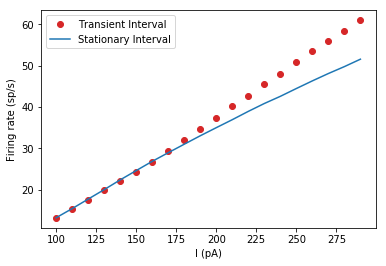

In [3]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex. tools import input_factory, plot_tools
from brian2 import *

# Descrição dos parâmetros do modelo
C = 100*pF; EL = -60*mV; VT = -40*mV; a = 0.03/ms; b = -2*pA/mV; Vmax = 35*mV; 
vreset = -50*mV; d = 100*b2.pA 
k = 0.7*pA/mV**2;
duration = 5000*ms;
current = np.arange(100,300,10)

# Modelo de neurônio
start_scope()
eqs = '''dvm/dt = ((k/C)*(((vm-EL)*(vm-VT)))- (u/C) + (current/C)) : volt
         du/dt = (a)*(b*(vm-EL)-u) : amp
         current: amp'''
G = NeuronGroup(len(current), eqs,
                    threshold='vm > Vmax',
                    reset='vm= vreset; u = u + d', method='euler', dt= 0.1*ms)
G.vm = EL
G.u = 0
G.current = current*b2.pA
statemon = b2.StateMonitor(G, ["vm","u"], record=True)
spikemon = b2.SpikeMonitor(G)

# Rodando a simulação
b2.run(duration)

input_current = [None]*len(current)
first_inter = [None]*len(current)
stationary_inter = [None]*len(current)
for i in range(len(current)):
    first_inter[i] = 1/(float(spikemon.spike_trains()[i][2]) - float(spikemon.spike_trains()[i][1]))
    stationary_inter[i] = 1/(float(spikemon.spike_trains()[i][-2]) - float(spikemon.spike_trains()[i][-3]))
    
# Plot

plt.plot(G.current/b2.pA, first_inter/b2.second, 'o' , c='C3', lw=3, label='Transient Interval')
plt.plot(G.current/b2.pA, stationary_inter/b2.second, label='Stationary Interval')
plt.xlabel('I (pA)')
plt.ylabel('Firing rate (sp/s)')
plt.legend()
plt.show()

